# 목적 : 강남 3구의 체감 안전도가 높다는 기사를 검증

In [1]:
#to get multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
crime_data_police = pd.read_csv('../data/02. crime_in_Seoul.csv', thousands=',', encoding = 'euc-kr') 
                                                                                #encoding = cp949도 가능
crime_data_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [4]:
# 관서명을 '서울**경찰서'로 바꾸기 

station_name = []

for name in crime_data_police['관서명']:
    station_name.append('서울'+ str(name[:-1])+'경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

## 경찰서 목록을 소속 구별로 변경하기 

In [5]:
# 1. 경찰서 이름으로 구 정보를 알아야 함.  - Google Maps 활용해서 주소와 위도, 경도 정보 얻기 
import googlemaps 

In [6]:
gmaps_key = "****************************" #google maps API에서 받은 key값
gmaps = googlemaps.Client(key=gmaps_key)

In [7]:
example = gmaps.geocode('서울중부경찰서', language = 'ko')  #return list. 

In [8]:
type(example)
len(example)
example
example[0] #1번재 꺼는 list. example 자체는 list

list

1

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

{'address_components': [{'long_name': '２７',
   'short_name': '２７',
   'types': ['premise']},
  {'long_name': '수표로',
   'short_name': '수표로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '을지로동',
   'short_name': '을지로동',
   'types': ['political', 'sublocality', 'sublocality_level_2']},
  {'long_name': '중구',
   'short_name': '중구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '서울특별시',
   'short_name': '서울특별시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '100-032', 'short_name': '100-032', 'types': ['postal_code']}],
 'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
 'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 37.56499548029149,
    'lng': 126.9909285802915},
   'southwest': {'lat': 37.56229751970849, 'lng': 126.9882306197

In [ ]:
# print("\n1")
# example[0].get("formatted_address")  #example 리스트의 첫번째 인수인 딕셔너리에서 키값이 formatted_address인 value를 불러와라. 
# example[0]["formatted_address"]

# print("\n2")
# type(example[0]["address_components"]) 
# example[0].get("address_components")
# example[0]["address_components"]

# print("\n3")
# #address_components 의 value값이 또 딕셔너리로 구성된 리스트임. 그래서 그 안에 있는걸 부르려면, 다시 인덱스 지정해줘야. 
# example[0].get("address_components")[1]
# example[0]["address_components"][1]

# print("\n4")
# example[0].get("address_components")[1].get("long_name")
# example[0]["address_components"][1]['long_name']

# print("\n5")
# example[0]["geometry"]
# example[0]["geometry"]['location']['lat']

In [9]:
#google maps API 사용하여 해당 경찰서 이름을 이용하여 주소 받아오기 

station_address = []
station_lat = []
station_lng = []

for name in station_name: 
    geoData = gmaps.geocode(name, language = 'ko')
    
    station_address.append(geoData[0]['formatted_address'])
    
    tmp_loc = geoData[0]['geometry']['location']
    
    station_lat.append(tmp_loc['lat'])
    station_lng.append(tmp_loc['lng'])
    
    print("\n",name,": ",geoData[0]['formatted_address'])
    print("\n lat: {}, lng: {} \n".format(tmp_loc['lat'],tmp_loc['lng']))
    




 서울중부경찰서 :  대한민국 서울특별시 중구 을지로동 수표로 27

 lat: 37.5636465, lng: 126.9895796 


 서울종로경찰서 :  대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46

 lat: 37.5755578, lng: 126.9848674 


 서울남대문경찰서 :  대한민국 서울특별시 중구 회현동 한강대로 410

 lat: 37.5547584, lng: 126.9734981 


 서울서대문경찰서 :  대한민국 서울특별시 서대문구 충현동 통일로 113

 lat: 37.5647848, lng: 126.9667762 


 서울혜화경찰서 :  대한민국 서울특별시 종로구 인의동 창경궁로 112-16

 lat: 37.5718529, lng: 126.9989143 


 서울용산경찰서 :  대한민국 서울특별시 용산구 원효로1가 백범로 329

 lat: 37.5387099, lng: 126.9659183 


 서울성북경찰서 :  대한민국 서울특별시 성북구 삼선동5가 301

 lat: 37.5897482, lng: 127.0161353 


 서울동대문경찰서 :  대한민국 서울특별시 동대문구 청량리동 약령시로21길 29

 lat: 37.58506149999999, lng: 127.0457679 


 서울마포경찰서 :  대한민국 서울특별시 마포구 아현동 618-1

 lat: 37.550814, lng: 126.954028 


 서울영등포경찰서 :  대한민국 서울특별시 영등포구 영등포동 영등포로46길 14

 lat: 37.5179839, lng: 126.9075056 


 서울성동경찰서 :  대한민국 서울특별시 성동구 행당동 왕십리광장로 9

 lat: 37.5617309, lng: 127.0363806 


 서울동작경찰서 :  대한민국 서울특별시 동작구 노량진1동 노량진로 148

 lat: 37.5130866, lng: 126.9428498 


 서울광진경찰서 :  대한민국 서울특별시 광진구 구의동 

In [ ]:
station_address

In [ ]:
station_lat

In [ ]:
station_lng

In [10]:
gu_name = []

for name in station_address:
    tmp = name.split()    #space를 기준으로 띄워서 저장
#     tmp
    
    tmp_gu = [gu for gu in tmp if gu[-1]=='구'][0]       
    # [0]이 없을 경우 ['중구']형태로 프린트됨. 왜? tem_gu가 list니까. 근데 나는 '중구' 만 리스트에 넣고싶으므로 인덱스 사용
    gu_name.append(tmp_gu)

gu_name
# # [출력표현식 for 요소 in 입력Sequence [if 조건식]]
#     for gu in tmp:
#         if gu[-1]=='구':
#             gu_name.append(gu)


['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [11]:
# 새로운 컬럼 추가하기
crime_data_police['자치구'] = gu_name
crime_data_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [12]:
# 금천 경찰서의 경우, 사실 관악구에 위치해 있음. 그걸 바꿔줘야함.  
#(그럼 구글맵에 잘못 올라와있단 소리임....? 일단, 아닌거 같지만 바꾸는걸 학습하는 개념으로 접근하겠음.)
crime_data_police[crime_data_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [13]:
# row 내용 업데이트하기
crime_data_police.loc[crime_data_police['관서명']=='금천서',['자치구']] = '관악구' #관악구로 자치구 바꾸기 
    # Set value for all items matching the list of labels
    # pd.loc[indexName w/ 조건, 바꾸고싶은 columnName] = value 지정
    
    
crime_data_police[crime_data_police['관서명']=='금천서'] #바꼈는지 확인

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


In [14]:
# 만들어 놓은 파일을 csv로 저장하기 

crime_data_police.to_csv("../data/02. crime_in_Seoul_include_gu_name.csv", sep=',', encoding = 'utf-8')

# pandas pivot_table 이용해서 데이터 정리하기 

In [15]:
crime_data_updated = pd.read_csv('../data/02. crime_in_Seoul_include_gu_name.csv', encoding = 'utf-8')
crime_data_updated.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [16]:
#index column 수정
crime_data_updated = pd.read_csv('../data/02. crime_in_Seoul_include_gu_name.csv', encoding = 'utf-8', index_col=0)
crime_data_updated.head()
crime_data_updated.sort_values(by = '자치구').head(8)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,강남구
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,강남구
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,강동구
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,강북구
18,관악서,9,8,12,14,320,221,2706,827,3298,2642,관악구
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구
12,광진서,4,4,14,26,240,220,3026,1277,2625,2180,광진구
22,구로서,8,6,15,11,281,164,2335,889,3007,2432,구로구


In [17]:
# 자치구를 기준으로 한 데이터 만들기 

crime_final = pd.pivot_table(crime_data_updated, index = '자치구', aggfunc = np.sum) 
    #aggfunc = np.sum: average가 아닌 sum 을 보여달라
crime_final.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,343,471,20,18,12,12,1715,4273,4418,5352
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [18]:
# 검거율 데이터 만들기 

crime_final['강간검거율'] = crime_final['강간 검거']/crime_final['강간 발생']*100
crime_final['강도검거율'] = crime_final['강도 검거']/crime_final['강도 발생']*100
crime_final['살인검거율'] = crime_final['살인 검거']/crime_final['살인 발생']*100
crime_final['절도검거율'] = crime_final['절도 검거']/crime_final['절도 발생']*100
crime_final['폭력검거율'] = crime_final['폭력 검거']/crime_final['폭력 발생']*100

crime_final.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,343,471,20,18,12,12,1715,4273,4418,5352,72.823779,111.111111,100.000000,40.135736,82.548580
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [19]:
# 검거 건수는 검거율로 대체 가능하므로 삭제

del crime_final['강간 검거']
del crime_final['강도 검거']
del crime_final['살인 검거']
del crime_final['절도 검거']
del crime_final['폭력 검거']

crime_final.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,471,18,12,4273,5352,72.823779,111.111111,100.000000,40.135736,82.548580
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [20]:
# 검거율중 100이 넘는게 있음. 전년도 발생 건수에 대한 검거도 포함이 되는듯 하나, 우리는 그냥 다 100으로 처리하겠음. 

column_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율'] 

for column in column_list:
#     print("\n",column)
#     print("\n",crime_final[column])
    crime_final.loc[crime_final[column] > 100, column] = 100  #for loop때문이 아니라, 원래loc가 전체 열의 data를 훑어서 바꿔줌.
        # 맨 뒤에 column 안써주면 모든 열이 다 바뀜 
        # Set value for all items matching the list of labels
        # pd.loc[ 조건, 바꾸고싶은 columnName] = value 지정

crime_final.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [21]:
# 뒤에 붙은 발생이라는 단어 삭제 - column name변경: rename


crime_final.rename(columns = {'강간 발생':'강간',
                            '강도 발생':'강도',
                            '살인 발생':'살인',
                            '절도 발생':'절도',
                            '폭력 발생':'폭력'}, inplace = True)
crime_final.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [22]:
# value들의 비교를 용이하게 하기 위해 각 컬럼별로 정규화(normalize) 진행 

from sklearn import preprocessing

col = ['강간','강도','살인','절도','폭력']

x = crime_final[col].values
# x
min_max_scaler = preprocessing.MinMaxScaler()  #모든 숫자를 0-1사이로 만들어줌

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_final_norm = pd.DataFrame(x_scaled, columns = col, index = crime_final.index)
crime_final_norm.head()

col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율'] 
crime_final_norm[col2] = crime_final[col2]  # crime_anal_norm의 column name을 crime_anal에서 가져옴
crime_final_norm.head()


,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.661386
강동구,0.146341,0.058824,0.166667,0.405919,0.289667
강북구,0.138211,0.529412,0.416667,0.115576,0.274769
관악구,1.000000,0.764706,0.833333,1.000000,0.913928
광진구,0.373984,0.529412,0.166667,0.611526,0.269094


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.146341,0.058824,0.166667,0.405919,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.138211,0.529412,0.416667,0.115576,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,1.000000,0.764706,0.833333,1.000000,0.913928,72.823779,100.000000,100.000000,40.135736,82.548580
광진구,0.373984,0.529412,0.166667,0.611526,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [23]:
# ch1 에서 했던 cctv데이터 가져오기 

result_cctv = pd.read_csv('../data/01. CCTV_result.csv', encoding = 'utf-8', index_col = '구별')
result_cctv.head()

crime_final_norm[['인구수', 'CCTV수']] = result_cctv[['인구수', '소계']]
crime_final_norm.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV수
자치구,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.146341,0.058824,0.166667,0.405919,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.138211,0.529412,0.416667,0.115576,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,1.000000,0.764706,0.833333,1.000000,0.913928,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496
광진구,0.373984,0.529412,0.166667,0.611526,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [24]:
#발생건수의 합 '범죄수총합'

col1 = ['강간','강도','살인','절도','폭력']

crime_final_norm['범죄수총합'] = np.sum(crime_final_norm[col1],axis = 1)

col2 = ['강간검거율', '강도검거율','살인검거율','절도검거율','폭력검거율']
crime_final_norm['검거율총합'] = np.sum(crime_final_norm[col2],axis = 1)

crime_final_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV수,범죄수총합,검거율총합
자치구,,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.327833,369.707384
강동구,0.146341,0.058824,0.166667,0.405919,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.067417,370.084431
강북구,0.138211,0.529412,0.416667,0.115576,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.474636,406.943540
관악구,1.000000,0.764706,0.833333,1.000000,0.913928,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.511967,395.508095
광진구,0.373984,0.529412,0.166667,0.611526,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,1.950683,416.915211


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# 범죄데이터 시각화

In [26]:
#그래프에 대한 한글 폰트문제 해결
import platform 
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    print("You have Mac OS")
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
    print("You have Window")
else: 
    print("Unkwon system..")

You have Mac OS


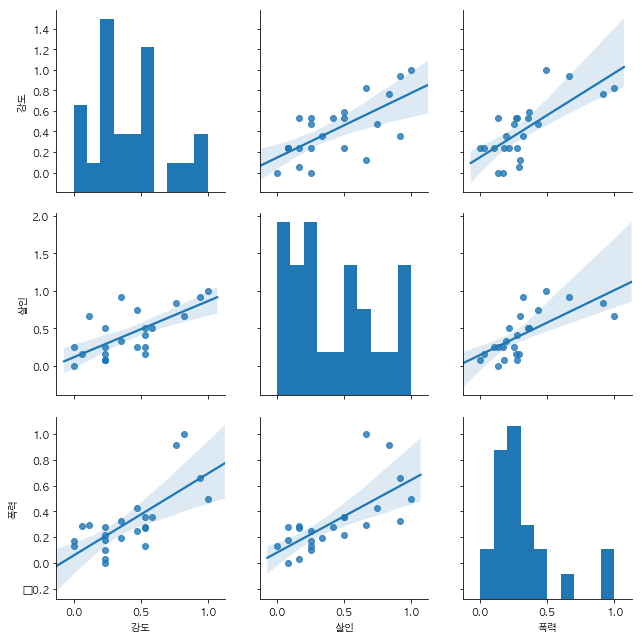

In [27]:
sns.pairplot(crime_final_norm, vars = ['강도','살인','폭력'], kind = 'reg', height = 3)
plt.show()

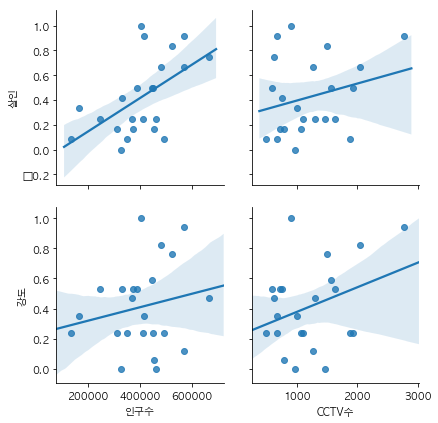

In [28]:
sns.pairplot(crime_final_norm, x_vars = ['인구수','CCTV수'], y_vars = ['살인','강도'],kind = 'reg', height = 3)
plt.show()

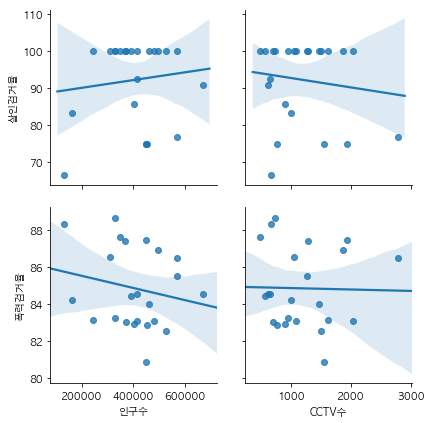

In [29]:
sns.pairplot(crime_final_norm, x_vars = ['인구수','CCTV수'], y_vars = ['살인검거율','폭력검거율'],kind = 'reg', height = 3)
plt.show()

In [30]:
# 범죄수 합으로 정렬해서 관찰 
target_col = ['강간','강도','살인','절도','폭력','범죄수avg']
crime_final_norm['범죄수avg'] = crime_final_norm['범죄수총합']/5
crime_final_norm_sort = crime_final_norm.sort_values(by = '범죄수avg', ascending = False)
# crime_final_norm_sort.head(10)
# crime_final_norm['범죄수총합'] = crime_final_norm['범죄수평균']
crime_final_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV수,범죄수총합,검거율총합,범죄수avg
자치구,,,,,,,,,,,,,,,
관악구,1.000000,0.764706,0.833333,1.000000,0.913928,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.511967,395.508095,0.902393
강남구,0.940379,0.941176,0.916667,0.868224,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.327833,369.707384,0.865567
양천구,0.758808,0.823529,0.666667,0.910592,1.000000,77.486911,84.210526,100.000000,48.469644,83.065080,479978.0,2034,4.159596,393.232162,0.831919
영등포구,0.523035,1.000000,1.000000,0.592212,0.493024,62.033898,90.909091,85.714286,32.995951,82.894737,402985.0,904,3.608271,354.547963,0.721654
송파구,0.319783,0.470588,0.750000,0.677882,0.427524,80.909091,76.923077,90.909091,34.856437,84.552352,667483.0,618,2.645777,368.150048,0.529155


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '범죄비율 (정규화된 발생 건수로 정렬)')

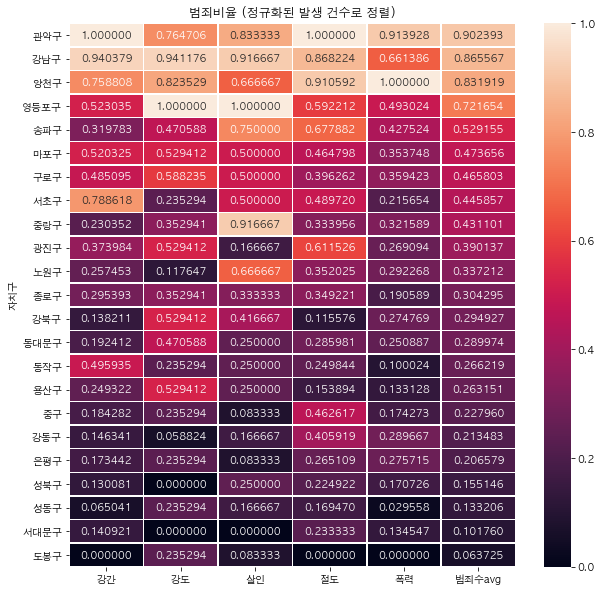

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_final_norm_sort[target_col], annot =True, fmt = 'f', linewidths = .5)
plt.title("범죄비율 (정규화된 발생 건수로 정렬)")
plt.show()

In [32]:
# 검거율 총합의 최고값을 100으로 한정하고, 지수화시키기

tmp_max = crime_final_norm['검거율총합'].max()
crime_final_norm['검거율총합'] = crime_final_norm['검거율총합']/tmp_max*100
crime_final_norm_sort = crime_final_norm.sort_values(by='검거율총합', ascending = False)
crime_final_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV수,범죄수총합,검거율총합,범죄수avg
자치구,,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.0,44.967074,87.626093,348646.0,485,0.318627,100.00000,0.063725
광진구,0.373984,0.529412,0.166667,0.611526,0.269094,91.666667,100.000000,100.0,42.200925,83.047619,372164.0,707,1.950683,96.37582,0.390137
동대문구,0.192412,0.470588,0.250000,0.285981,0.250887,84.393064,100.000000,100.0,41.090358,87.401884,369496.0,1294,1.449868,95.44425,0.289974
용산구,0.249322,0.529412,0.250000,0.153894,0.133128,89.175258,100.000000,100.0,37.700706,83.121951,244203.0,1624,1.315757,94.77679,0.263151
성동구,0.065041,0.235294,0.166667,0.169470,0.029558,94.444444,88.888889,100.0,37.149969,86.538462,311244.0,1062,0.666030,94.08881,0.133206


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '범죄 검거 비율 (정규화된 검거의 합으로 정렬)')

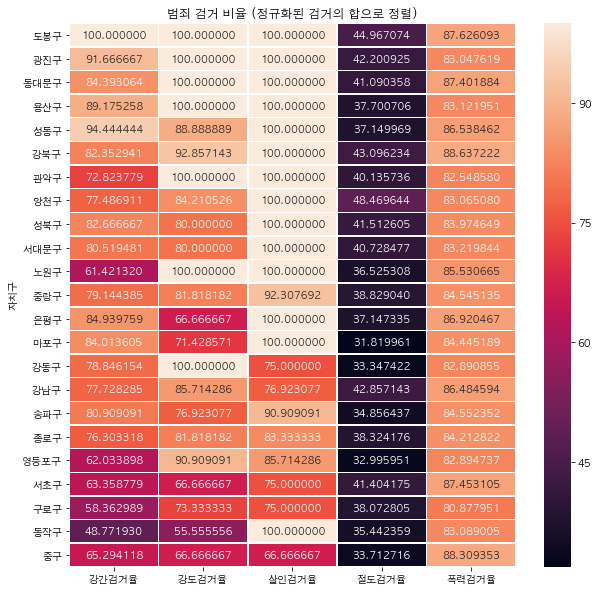

In [33]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율'] 

plt.figure(figsize = (10,10))
sns.heatmap(crime_final_norm_sort[target_col], annot=True, fmt = 'f', linewidths = .5)
plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
plt.show()

In [34]:
#데이터 저장

crime_final_norm.to_csv('../data/02. crime_in_Seoul_final.csv', sep = ',', encoding = 'utf-8')

# 서울시 범죄율에 대한 지도 시각화 

In [35]:
import json 
import folium

geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str

In [36]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, 
                tiles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_final_norm['살인'], 
              columns = [crime_final_norm.index, crime_final_norm['살인']], 
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

/Users/Donghee/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [37]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, 
                tiles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_final_norm['강간'], 
              columns = [crime_final_norm.index, crime_final_norm['강간']], 
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

In [38]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, 
                tiles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_final_norm['범죄수총합'], 
              columns = [crime_final_norm.index, crime_final_norm['범죄수총합']], 
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

In [39]:
#인구수고려 인구 대비 범죄 발생 비율 알아보기 

tmp_criminal = crime_final_norm['살인']/crime_final_norm['인구수']*1000000

map = folium.Map(location = [37.5502,126.982], zoom_start = 11,
                tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str, data = tmp_criminal, columns = [crime_final.index, tmp_criminal],
              fill_color = 'YlGnBu', key_on = 'feature.id')

map

# 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화하기 

In [40]:
crime_data_updated['lat'] = station_lat
crime_data_updated['lng'] = station_lng

col = ['살인 검거', '강도 검거','강간 검거','절도 검거','폭력 검거']
tmp = crime_data_updated[col]/crime_data_updated[col].max()

crime_data_updated['검거'] = np.sum(tmp, axis = 1)

crime_data_updated.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,자치구,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [41]:
#경찰서의 위도와 경도 정보 이용하여 경찰서 위치 확인

map = folium.Map(location = [37.5502,126.982], zoom_start = 11)

for n in crime_data_updated.index:
    folium.Marker([crime_data_updated['lat'][n], crime_data_updated['lng'][n]]).add_to(map)
   
map
    

In [42]:
#검거율을 원의 넓이로 표현

map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for n in crime_data_updated.index:
    folium.CircleMarker([crime_data_updated['lat'][n], crime_data_updated['lng'][n]],
                       radius = crime_data_updated['검거'][n]*10, 
                        color = '#3186cc', fill_color = '#3186cc').add_to(map)
map

In [43]:
# 범죄 발생 건수 넣기 

map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)


map.choropleth(geo_data = geo_str, 
              data = crime_final_norm['범죄수총합'],
              columns = [crime_final_norm.index, crime_final_norm['범죄수총합']],
              fill_color = 'PuRd',
              key_on = 'feature.id')

for n in crime_data_updated.index:
    folium.CircleMarker([crime_data_updated['lat'][n], crime_data_updated['lng'][n]],
                       radius = crime_data_updated['검거'][n]*10, 
                        color = '#3186cc', fill_color = '#3186cc').add_to(map)
map